<a href="https://colab.research.google.com/github/nirmalamondal/29assignment/blob/main/Implementation_of_ANN_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
#checking version of TensorFlow ans keras
print(f"Tensorflow version {tf.__version__}")
print(f"Tensorflow version {tf.keras.__version__}")

Tensorflow version 2.12.0
Tensorflow version 2.12.0


In [3]:
os.getcwd()

'/content'

In [4]:
#GPU/CPU check
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#GPU/CPU check
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU','CPU']


for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available")
    print(f"Details >> {out}")
  else:
    print(f"{device} not available")


GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Creating a simple classifier using keras on MNIST data

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full :{X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full :(60000, 28, 28)


In [12]:
#create validation dataset from full training data
#scale the data between 0 and 1 by dividing it by 255 as its  an unsigned data between 0-255 range
X_valid,X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]

In [13]:
#scale the test data
x_test = X_test/255

In [14]:
len(X_train_full[5000:])

55000

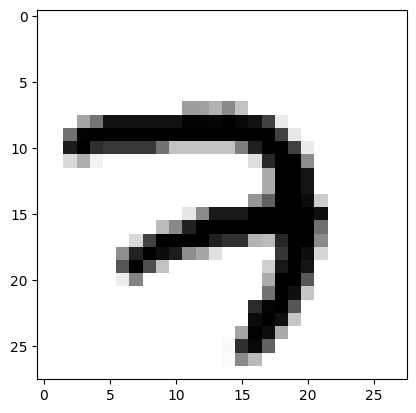

In [15]:
#Lets view some data
plt.imshow(X_train[0],cmap = 'binary')
plt.show()

<Axes: >

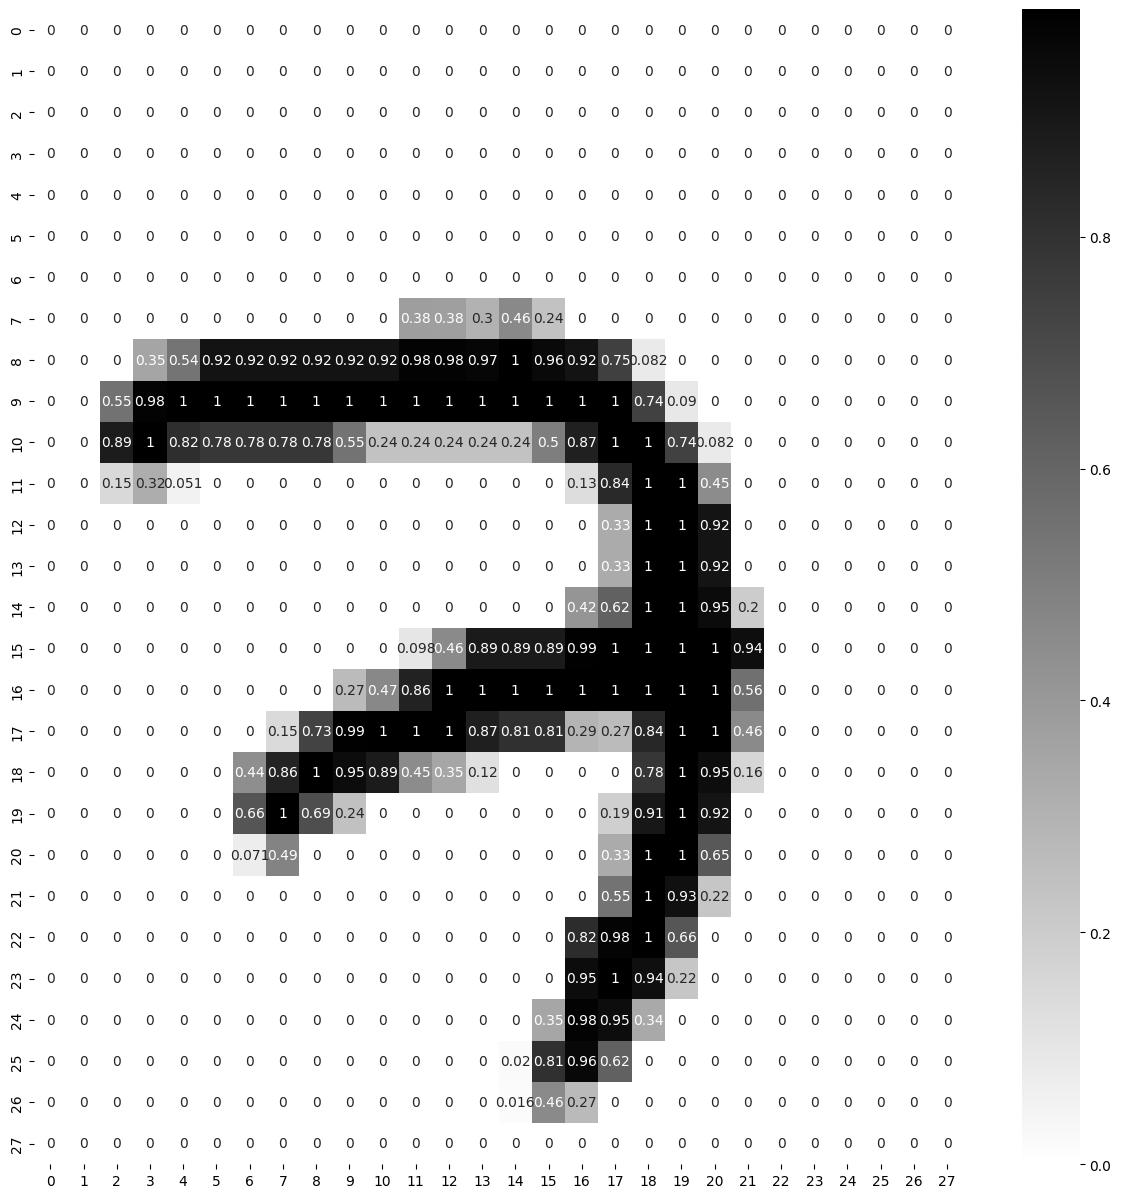

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot = True,cmap = 'binary')

In [17]:
#creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28],name="inputLayer"),
          tf.keras.layers.Dense(300,activation = 'relu',name="hiddenLayer1"),
           tf.keras.layers.Dense(100,activation = 'relu',name="hiddenLayer2"),
           tf.keras.layers.Dense(10,activation = 'softmax',name="outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [18]:
'''from keras.models import Sequential
from keras.layers import Dense,Flatten

#Define the model
model = Sequential()
model.add(Dense(units = 64,activation='relu',input_dim = 100))
model.add(Dense(units = 10,activation='softmax')'''


"from keras.models import Sequential\nfrom keras.layers import Dense,Flatten\n\n#Define the model\nmodel = Sequential()\nmodel.add(Dense(units = 64,activation='relu',input_dim = 100))\nmodel.add(Dense(units = 10,activation='softmax')"

In [19]:
model_clf.layers

In [20]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
#firstlayer * secondlayer + bias
784 * 300 + 300, 300*100+100, 100 * 10 +10

(235500, 30100, 1010)

In [22]:
#total parameter to be trained
sum((235500, 30100, 1010))

266610

In [23]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [24]:
len(hidden1.get_weights())

2

In [25]:
hidden1.get_weights()

[array([[ 0.02631597,  0.06500524, -0.07175765, ..., -0.05538776,
          0.00390655, -0.02759458],
        [-0.06315435, -0.01091818, -0.00084493, ...,  0.06312186,
          0.06031902,  0.00760669],
        [-0.05160864, -0.01500954, -0.04750697, ..., -0.04463743,
         -0.03571717, -0.05614288],
        ...,
        [ 0.06411585, -0.00377601,  0.00023901, ...,  0.07300721,
          0.0201562 , -0.03596722],
        [-0.02892093,  0.05248073, -0.02407032, ..., -0.00190613,
          0.0042538 ,  0.05781925],
        [-0.04857783, -0.04468476,  0.0465211 , ..., -0.03705372,
          0.07084191, -0.04305084]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
hidden1.get_weights()[0].shape

(784, 300)

In [27]:
hidden1.get_weights()[1].shape

(300,)

In [28]:
weights , biases = hidden1.get_weights()

In [29]:
weights.shape

(784, 300)

In [30]:
print("shape\n",weights.shape,'\n')
weights

shape
 (784, 300) 



array([[ 0.02631597,  0.06500524, -0.07175765, ..., -0.05538776,
         0.00390655, -0.02759458],
       [-0.06315435, -0.01091818, -0.00084493, ...,  0.06312186,
         0.06031902,  0.00760669],
       [-0.05160864, -0.01500954, -0.04750697, ..., -0.04463743,
        -0.03571717, -0.05614288],
       ...,
       [ 0.06411585, -0.00377601,  0.00023901, ...,  0.07300721,
         0.0201562 , -0.03596722],
       [-0.02892093,  0.05248073, -0.02407032, ..., -0.00190613,
         0.0042538 ,  0.05781925],
       [-0.04857783, -0.04468476,  0.0465211 , ..., -0.03705372,
         0.07084191, -0.04305084]], dtype=float32)

In [31]:
print("shape\n",biases.shape,'\n')
biases

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" #use =>tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" #or use with custom learing rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [33]:
EPOCHS = 30
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs = EPOCHS,
                        validation_data = VALIDATION_SET,batch_size = 32)


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6167 - accuracy: 0.8407 - val_loss: 0.3022 - val_accuracy: 0.9164
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2826 - accuracy: 0.9203 - val_loss: 0.2313 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2301 - accuracy: 0.9347 - val_loss: 0.1984 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1977 - accuracy: 0.9438 - val_loss: 0.1788 - val_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1735 - accuracy: 0.9503 - val_loss: 0.1567 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1545 - accuracy: 0.9558 - val_loss: 0.1437 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1389 - accuracy: 0.9612 - val_loss: 0.1352 - val_accuracy:

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [35]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.616714,0.840709,0.302221,0.9164
1,0.282555,0.920291,0.231261,0.9342
2,0.230117,0.934655,0.198399,0.9426
3,0.197701,0.943818,0.178763,0.9506
4,0.173503,0.950327,0.156662,0.9580
5,0.154521,0.955800,0.143742,0.9616
6,0.138887,0.961164,0.135151,0.9650
7,0.125797,0.964273,0.126426,0.9658
8,0.114208,0.967891,0.115914,0.9700
9,0.104822,0.970509,0.108326,0.9698


<Axes: >

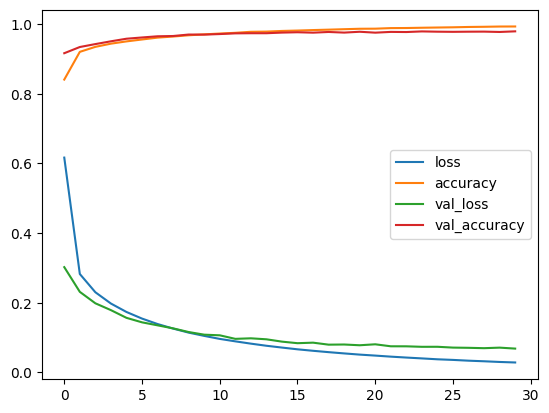

In [36]:
pd.DataFrame(history.history).plot()

In [37]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 12.5756 - accuracy: 0.9766


[12.575577735900879, 0.9765999913215637]

In [38]:
x_new = X_test[:3]

In [39]:
actual = y_test[:3]

In [40]:
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

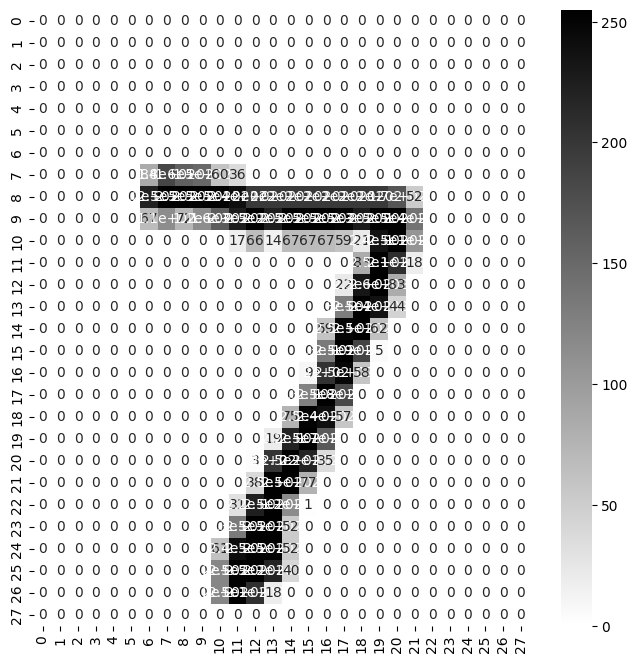

In [41]:
plt.figure(figsize = (8,8))
sns.heatmap(X_test[0],annot = True,cmap = 'binary')

In [42]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 140ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred = np.argmax(y_prob,axis = -1)

In [45]:
y_pred

array([7, 2, 1])

In [46]:
actual

array([7, 2, 1], dtype=uint8)

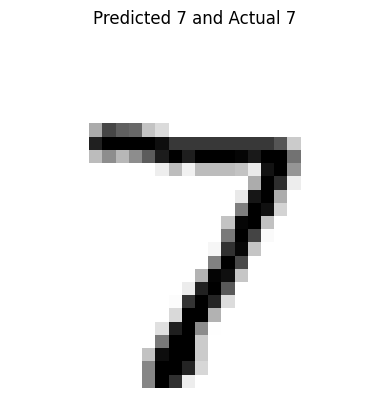

##################


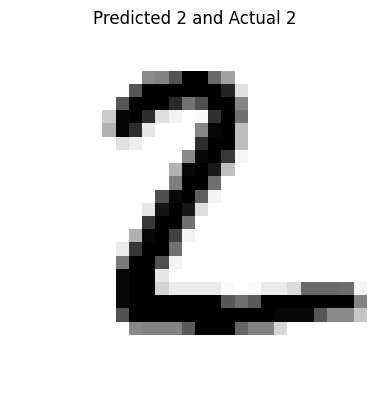

##################


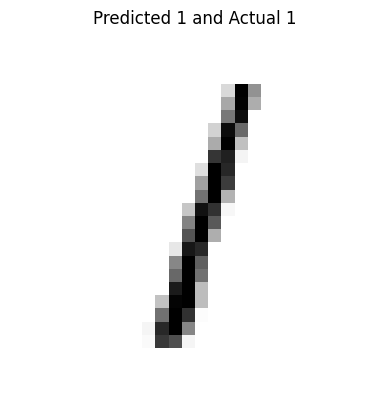

##################


In [47]:
for data,pred,actual_data in zip(x_new,y_pred,actual):
  plt.imshow(data, cmap = 'binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("##################")
